In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Skip metadata rows (first 4 lines are not data)
df = pd.read_csv("population_data.csv", skiprows=4)

In [20]:
# Drop completely empty columns
df = df.dropna(axis=1, how="all")

In [21]:
# Reshape to long format (Year, Population)
df_long = df.melt(
    id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"],
    var_name="Year",
    value_name="Population"
)

In [22]:
# Convert datatypes
df_long["Year"] = pd.to_numeric(df_long["Year"], errors="coerce")
df_long["Population"] = pd.to_numeric(df_long["Population"], errors="coerce")

In [23]:
# Drop missing population rows
df_long = df_long.dropna(subset=["Population"])


In [24]:
# Drop missing population rows
df_long = df_long.dropna(subset=["Population"])

In [25]:
print("\nPreview Long Format Data:\n", df_long.head())



Preview Long Format Data:
                   Country Name Country Code     Indicator Name Indicator Code  \
0                        Aruba          ABW  Population, total    SP.POP.TOTL   
1  Africa Eastern and Southern          AFE  Population, total    SP.POP.TOTL   
2                  Afghanistan          AFG  Population, total    SP.POP.TOTL   
3   Africa Western and Central          AFW  Population, total    SP.POP.TOTL   
4                       Angola          AGO  Population, total    SP.POP.TOTL   

   Year   Population  
0  1960      54922.0  
1  1960  130075728.0  
2  1960    9035043.0  
3  1960   97630925.0  
4  1960    5231654.0  


In [26]:
# EDA for Project Use

# 1. Basic info
print("\nNumber of Countries:", df_long["Country Name"].nunique())
print("\nYears Available:", df_long["Year"].min(), "to", df_long["Year"].max())



Number of Countries: 265

Years Available: 1960 to 2024


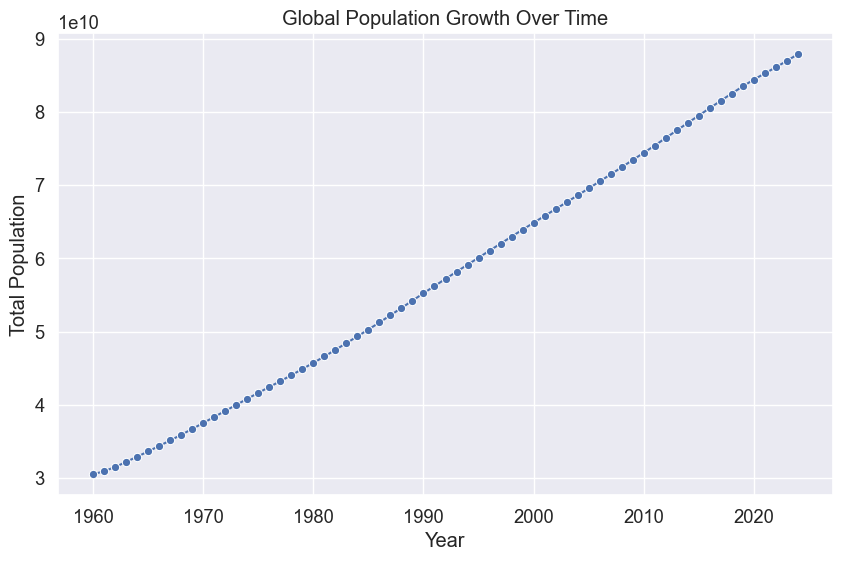

In [28]:
# 2. Global population trend
global_trend = df_long.groupby("Year")["Population"].sum().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(x="Year", y="Population", data=global_trend, marker="o")
plt.title("Global Population Growth Over Time")
plt.ylabel("Total Population")
plt.show()


C:\Users\Siddharth Ramgundam\AppData\Local\Temp\ipykernel_17512\2175064524.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Population", y="Country Name", data=top10, palette="viridis")


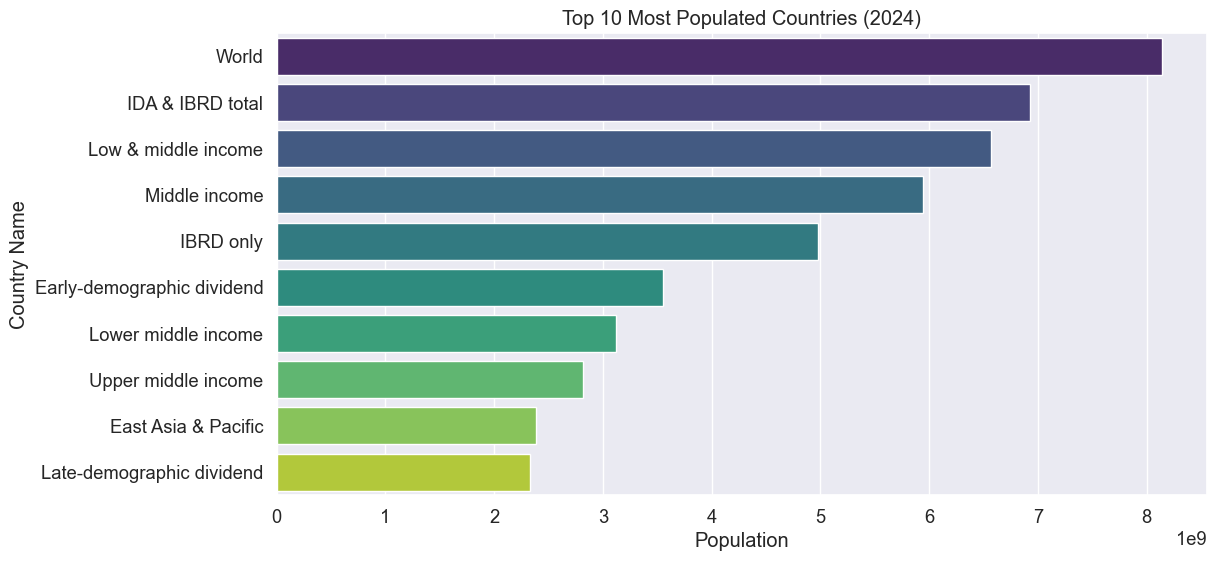

In [29]:
# 3. Top populated countries in latest year
latest_year = df_long["Year"].max()
latest_data = df_long[df_long["Year"] == latest_year]

top10 = latest_data.nlargest(10, "Population")

plt.figure(figsize=(12,6))
sns.barplot(x="Population", y="Country Name", data=top10, palette="viridis")
plt.title(f"Top 10 Most Populated Countries ({latest_year})")
plt.show()

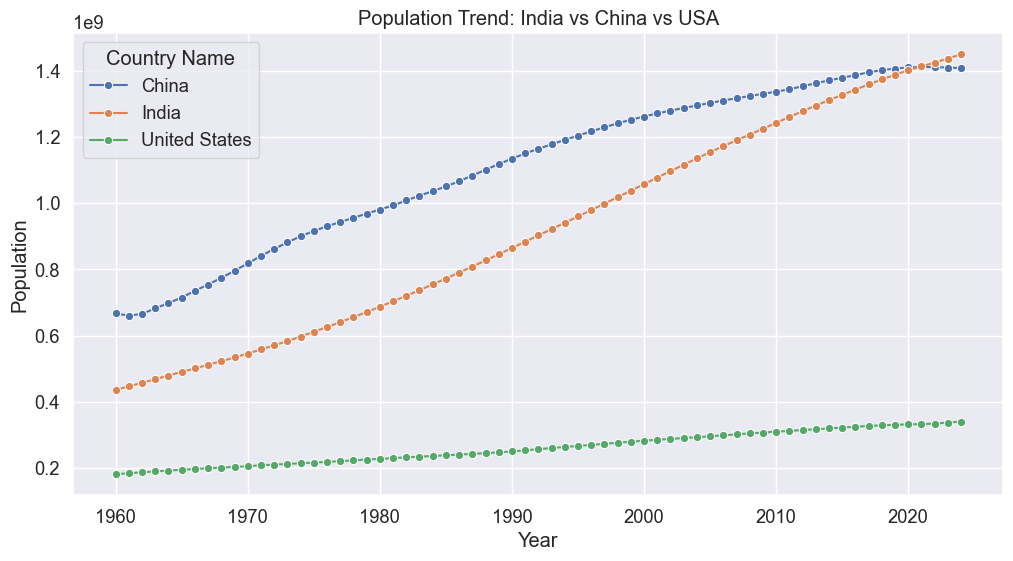

In [34]:
# 4. Population trend for selected countries (example: India, China, USA)
countries = ["India", "China", "United States"]
subset = df_long[df_long["Country Name"].isin(countries)]

plt.figure(figsize=(12,6))
sns.lineplot(x="Year", y="Population", hue="Country Name", data=subset, marker="o")
plt.title("Population Trend: India vs China vs USA")
plt.ylabel("Population")
plt.show()


In [36]:
df_long.to_csv("population_cleaned.csv", index=False)
